In [1]:
from pathlib import Path

IMG_FORMAT = "atlas-{atlas}_space-MNI152NLin2009cAsym_res-01_dseg.nii.gz"
LUT_FORMAT = "atlas-{atlas}_dseg.tsv"
ATLAS = "AAL116"

DATA_ROOT = Path(f"/media/storage/yalab-dev/qsiprep_test/derivatives/qsirecon/atlases/atlas-{ATLAS}")

atlas_img = DATA_ROOT / IMG_FORMAT.format(atlas=ATLAS)
lut_file = DATA_ROOT / LUT_FORMAT.format(atlas=ATLAS)

In [2]:
from parcellate.parcellation.volume import VolumetricParcellator

vp = VolumetricParcellator(atlas_img=atlas_img, lut=lut_file, mask="gm")
# BUILTIN_STATISTICS

In [3]:
fname1 = "/media/storage/yalab-dev/BIDS/derivatives/CAT12.9_2577.new/sub-0048R/ses-202303161349/anat/mwp1sub-0048R_ses-202303161349_ce-corrected_T1w.nii"
# fname2 = "/media/storage/yalab-dev/qsiprep_test/derivatives/qsirecon/derivatives/qsirecon-DIPYDKI/sub-CLMC10/ses-202410100845/dwi/sub-CLMC10_ses-202410100845_dir-AP_space-MNI152NLin2009cAsym_model-dki_param-md_dwimap.nii.gz"

vp.fit(fname1)

In [4]:
# vp._stat_functions
# res = vp.transform(fname2)
# from parcellate.metrics.base import Statistic


# def print_s():
#     print("asdasd")

# Statistic(name="test", function=print_s, requires_image=False)
res = vp.transform(fname1)

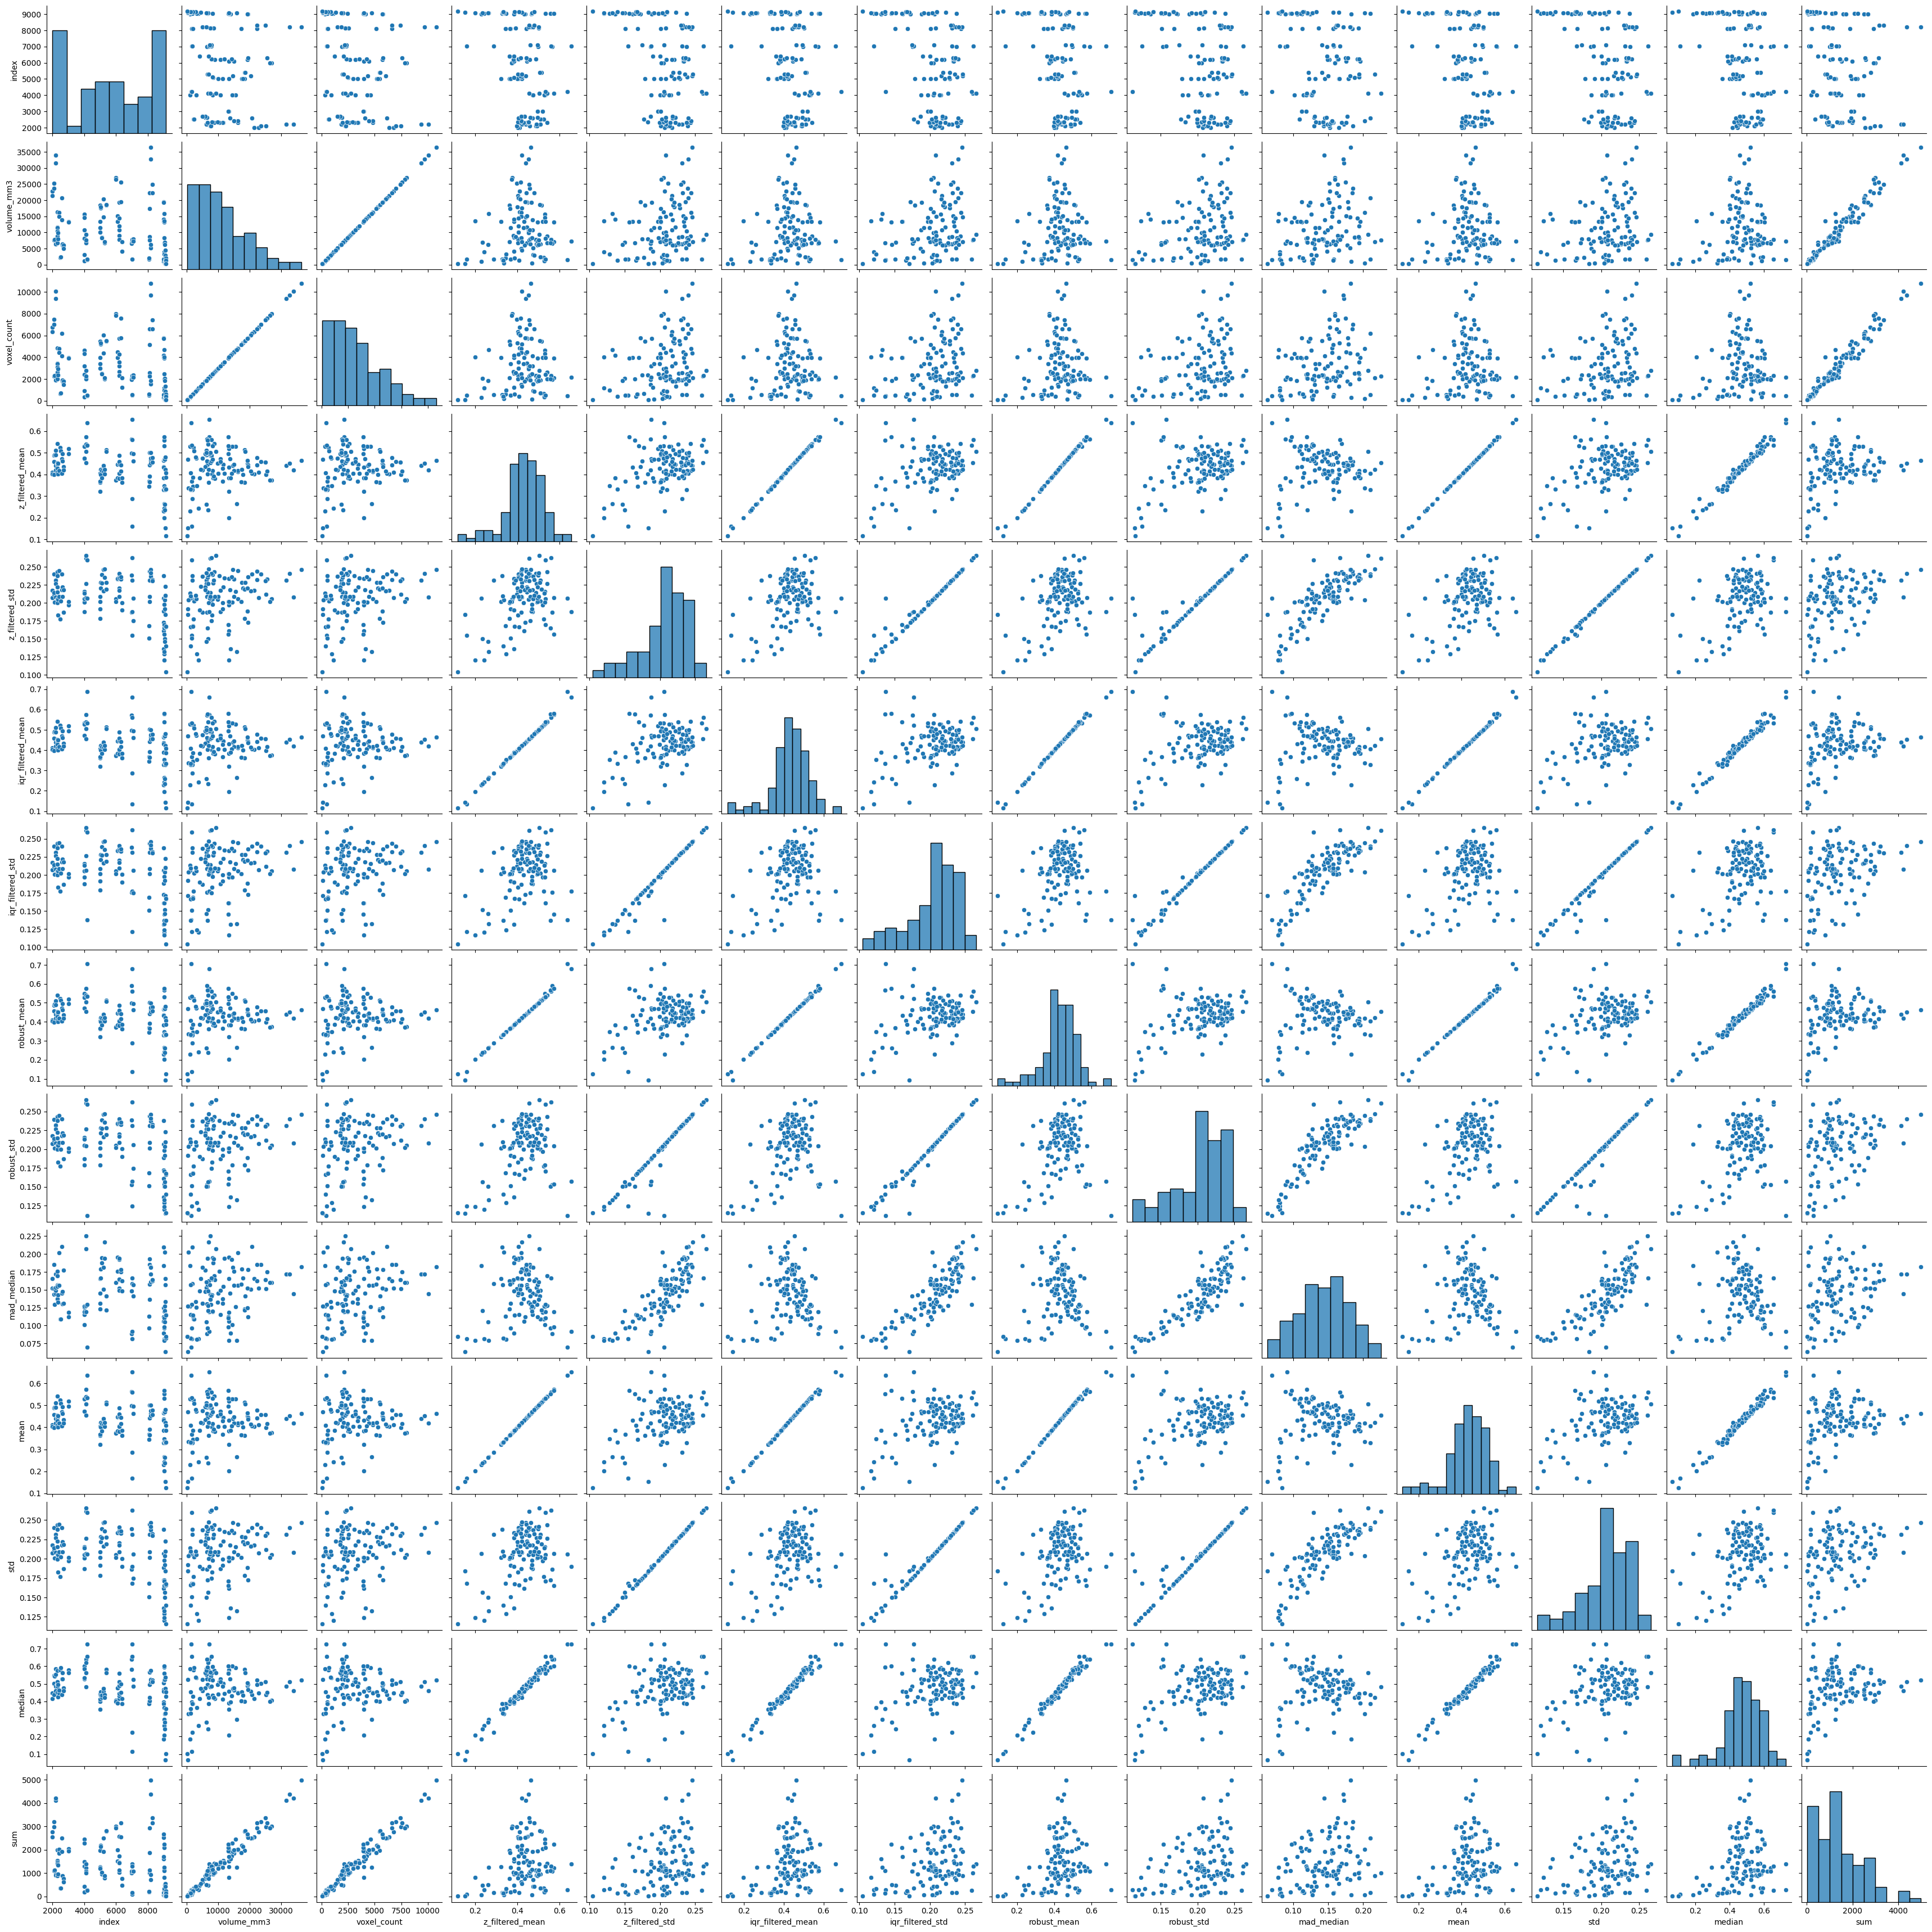

In [5]:
import seaborn as sns

sns.pairplot(res)

Text(0.5, 0, 'Mean MD Value')

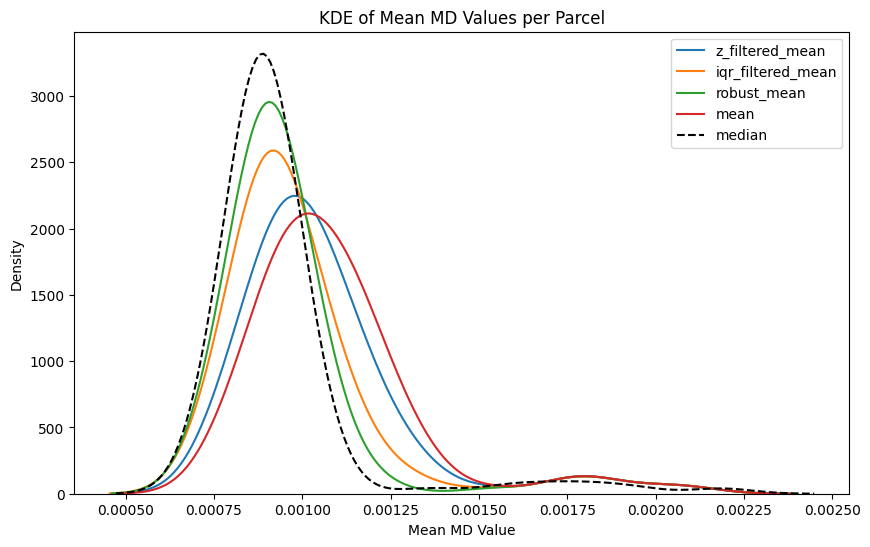

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
m_cols = res.filter(like="mean").columns
for col in m_cols:
    sns.kdeplot(res[col].dropna(), ax=ax, label=col)
sns.kdeplot(res["median"], ax=ax, label="median", linestyle="--", color="black")
ax.legend()
ax.set_title("KDE of Mean MD Values per Parcel")
ax.set_xlabel("Mean MD Value")